     season   holiday  workingday   weather      temp     atemp  humidity  \
0 -1.349802 -0.171483   -1.460605 -0.660148 -1.333599 -1.092687  0.993167   
1 -1.349802 -0.171483   -1.460605 -0.660148 -1.438841 -1.182367  0.941206   
2 -1.349802 -0.171483   -1.460605 -0.660148 -1.438841 -1.182367  0.941206   
3 -1.349802 -0.171483   -1.460605 -0.660148 -1.333599 -1.092687  0.681399   
4 -1.349802 -0.171483   -1.460605 -0.660148 -1.333599 -1.092687  0.681399   

   windspeed    casual  registered     year     month  
0  -1.567682 -0.660962   -0.943810 -1.00382 -1.603048  
1  -1.567682 -0.560882   -0.818015 -1.00382 -1.603048  
2  -1.567682 -0.620930   -0.851119 -1.00382 -1.603048  
3  -1.567682 -0.660962   -0.963673 -1.00382 -1.603048  
4  -1.567682 -0.721009   -1.023260 -1.00382 -1.603048  
Оценка 100 баллов
[ 14.89029795  38.92497408  30.88767161 ... 168.52767261 130.06124494
  89.11415474]


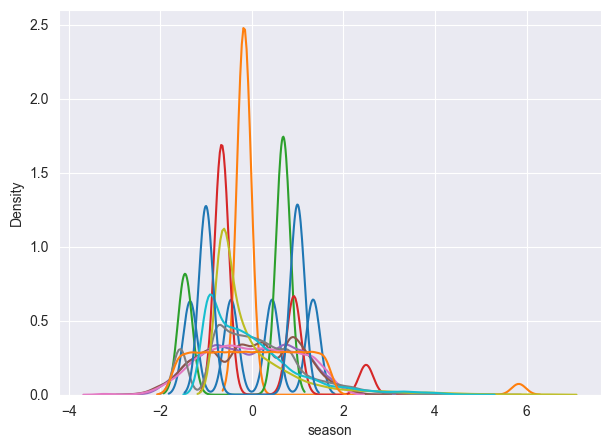

In [1]:
from linReg import linReg
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

link = 'C:/Users/User/OneDrive/Desktop/train.csv'
data = pd.read_csv(link)
data.head(10)
df = pd.DataFrame(data)
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df.head()

x = data.drop(['count', 'datetime'], axis=1)
y = data['count']

x_scaled = (x - x.mean()) / x.std()

print(x_scaled.head())

plt.figure(figsize=(7, 5))
for i in x_scaled.columns:
    sns.kdeplot(x_scaled[i])

x = x_scaled.values.T
y = y.values

model = linReg(iters=5000, lr=0.001)

model.find_weights(x, y)
pred = model.predict(x)

assert pred.shape == y.shape, "Неправильные размеры"

RSS = ((y - pred) ** 2).sum()
TSS = ((y - y.mean()) ** 2).sum()

score = 1 - RSS / TSS
print(
    f'Оценка {100 if score >= 0.79 else (85 if score >= 0.69 else (70 if score >= 0.55 else (40 if score > 0.5 else 0)))} баллов')

print(pred)
